In [3]:
from torchvision.datasets import CIFAR10
train_data=CIFAR10(root="./train/",
                  train=True,
                  download=True)

100%|██████████| 170498071/170498071 [00:17<00:00, 9970885.07it/s] 


Extracting ./train/cifar-10-python.tar.gz to ./train/


In [4]:
print(train_data)
data, label = train_data[0]
print(data)
print(label)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
<PIL.Image.Image image mode=RGB size=32x32 at 0x7A17904D6B00>
6


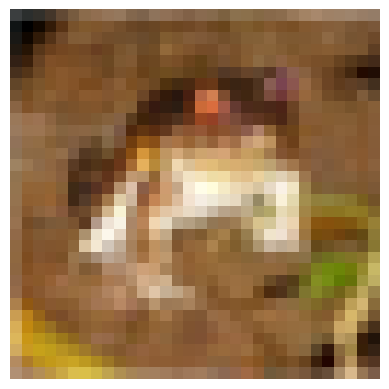

frog


In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming your image is stored in the variable 'image'
# Display the image
plt.imshow(data)
plt.axis('off')  # Hide axes for a cleaner display
plt.show()
print(train_data.classes[label])

In [7]:
test_data=CIFAR10(root="./test/",
                 train=False,
                 download=True)
print(test_data)
print(test_data.data.shape)

100%|██████████| 170498071/170498071 [00:12<00:00, 13657157.30it/s]


Extracting ./test/cifar-10-python.tar.gz to ./test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
(10000, 32, 32, 3)


In [8]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomCrop(32,padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2023, 0.1994, 0.2010)
            )
        ]
    )

train_data=CIFAR10(root="./train/",
                  train=True,
                  download=True,
                  transform=train_transforms)

Files already downloaded and verified


In [9]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [11]:
test_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2023, 0.1994, 0.2010)
            )
])

test_data=CIFAR10(root="./test/",
                 train=False,
                 download=True,
                 transform=test_transforms)

Files already downloaded and verified


In [19]:
import torch

train_set, val_set= torch.utils.data.random_split(train_data,
                                                  [40000,10000])

train_loader=torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True
)
val_loader=torch.utils.data.DataLoader(
    val_set,
    batch_size=16,
    shuffle=True
)
test_loader=torch.utils.data.DataLoader(
    test_data,
    batch_size=16,
    shuffle=False
)

In [27]:
import torch
from torch import nn
import torch.nn.functional as F
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,int(x.nelement()/x.shape[0]))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
  
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)
model = LeNet5().to(device)

cuda


In [28]:
from torch import optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),
                   lr=0.001,
                   momentum=0.9)

In [29]:
from tqdm import tqdm

N_EPOCHS=15

for epoch in tqdm(range(N_EPOCHS)):
    # Training
    train_loss=0.0
    model.train()
    for inputs, labels in train_loader:
        inputs=inputs.to(device)
        labels=labels.to(device)
        
        optimizer.zero_grad()
        
        output=model(inputs)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        train_loss+=loss.item()
    
    val_loss = 0.0
    model.eval()
    for inputs, labels in val_loader:
        inputs=inputs.to(device)
        labels=labels.to(device)
        
        output=model(inputs)
        loss=criterion(output,labels)
        
        val_loss+=loss.item()
    
    print(
      "Epoch: {} Train Loss: {} Val Loss: {}".format(
                  epoch,
                  train_loss/len(train_loader),
                  val_loss/len(val_loader)))

  7%|▋         | 1/15 [00:24<05:49, 24.94s/it]

Epoch: 0 Train Loss: 1.9820028233528137 Val Loss: 1.8108505226135254


 13%|█▎        | 2/15 [00:49<05:24, 24.96s/it]

Epoch: 1 Train Loss: 1.672750572156906 Val Loss: 1.6021376466751098


 20%|██        | 3/15 [01:14<04:58, 24.85s/it]

Epoch: 2 Train Loss: 1.5512528770208358 Val Loss: 1.486975992012024


 27%|██▋       | 4/15 [01:39<04:32, 24.80s/it]

Epoch: 3 Train Loss: 1.4662409833669663 Val Loss: 1.427559928226471


 33%|███▎      | 5/15 [02:04<04:08, 24.80s/it]

Epoch: 4 Train Loss: 1.4047328823566436 Val Loss: 1.3987710995674134


 40%|████      | 6/15 [02:28<03:43, 24.79s/it]

Epoch: 5 Train Loss: 1.355032568502426 Val Loss: 1.3631265820503236


 47%|████▋     | 7/15 [02:53<03:18, 24.86s/it]

Epoch: 6 Train Loss: 1.3141759638547896 Val Loss: 1.3288572157859802


 53%|█████▎    | 8/15 [03:18<02:54, 24.87s/it]

Epoch: 7 Train Loss: 1.2810347784876823 Val Loss: 1.270709200143814


 60%|██████    | 9/15 [03:43<02:28, 24.83s/it]

Epoch: 8 Train Loss: 1.256643347644806 Val Loss: 1.256096582698822


 67%|██████▋   | 10/15 [04:08<02:04, 24.86s/it]

Epoch: 9 Train Loss: 1.2309554531097413 Val Loss: 1.2293575060367585


 73%|███████▎  | 11/15 [04:33<01:39, 24.80s/it]

Epoch: 10 Train Loss: 1.2102745650053024 Val Loss: 1.2094044607162475


 80%|████████  | 12/15 [04:57<01:14, 24.75s/it]

Epoch: 11 Train Loss: 1.1844349576592446 Val Loss: 1.2206329978942871


 87%|████████▋ | 13/15 [05:22<00:49, 24.76s/it]

Epoch: 12 Train Loss: 1.1733468649506569 Val Loss: 1.1719963161468505


 93%|█████████▎| 14/15 [05:47<00:24, 24.74s/it]

Epoch: 13 Train Loss: 1.1563253045082091 Val Loss: 1.1443460829734802


100%|██████████| 15/15 [06:12<00:00, 24.80s/it]

Epoch: 14 Train Loss: 1.1344736009478569 Val Loss: 1.1553572600841522


In [34]:
num_correct = 0.0
for x_test_batch, y_test_batch in tqdm(test_loader):
    model.eval()
    y_test_batch=y_test_batch.to(device)
    x_test_batch=x_test_batch.to(device)
    y_pred_batch=model(x_test_batch)
    
    _,predicted = torch.max(y_pred_batch,1)
    num_correct+=(predicted==y_test_batch).float().sum()
    
accuracy=num_correct/(len(test_loader)*test_loader.batch_size)
print(len(test_loader), test_loader.batch_size)
print("Test Accuracy: {}".format(accuracy))

100%|██████████| 625/625 [00:02<00:00, 216.40it/s]

625 16
Test Accuracy: 0.6263999938964844


In [40]:
print(y_pred_batch.shape)
print(torch.max(y_pred_batch,1))
print(y_test_batch)

torch.Size([16, 10])
torch.return_types.max(
values=tensor([3.3832, 2.5617, 4.3818, 3.8356, 7.4977, 4.4408, 4.8321, 6.8242, 2.3385,
        3.1126, 3.9255, 2.3550, 3.9925, 4.6942, 3.3329, 7.5614],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([7, 3, 8, 0, 1, 4, 7, 0, 3, 3, 3, 3, 3, 5, 1, 7], device='cuda:0'))
tensor([7, 5, 8, 0, 8, 2, 7, 0, 3, 5, 3, 8, 3, 5, 1, 7], device='cuda:0')
